In [1]:
import numpy as np
import robosuite as suite

from PIL import Image
from IPython.display import display

In [2]:
suite.ALL_ENVIRONMENTS

dict_keys(['Lift', 'Stack', 'NutAssembly', 'NutAssemblySingle', 'NutAssemblySquare', 'NutAssemblyRound', 'PickPlace', 'PickPlaceSingle', 'PickPlaceMilk', 'PickPlaceBread', 'PickPlaceCereal', 'PickPlaceCan', 'Door', 'Wipe', 'TwoArmLift', 'TwoArmPegInHole', 'TwoArmHandoff'])

In [3]:
suite.ALL_ROBOTS

dict_keys(['Sawyer', 'Baxter', 'Panda', 'Jaco', 'Kinova3', 'IIWA', 'UR5e'])

In [4]:
suite.ALL_GRIPPERS

dict_keys(['RethinkGripper', 'PandaGripper', 'JacoThreeFingerGripper', 'JacoThreeFingerDexterousGripper', 'WipingGripper', 'Robotiq85Gripper', 'Robotiq140Gripper', 'RobotiqThreeFingerGripper', 'RobotiqThreeFingerDexterousGripper', None])

In [5]:
suite.ALL_CONTROLLERS

dict_keys(['JOINT_VELOCITY', 'JOINT_TORQUE', 'JOINT_POSITION', 'OSC_POSITION', 'OSC_POSE', 'IK_POSE'])

In [6]:
env = suite.make(
    env_name="Lift",
    robots="Sawyer",
    has_renderer=False,
    ignore_done=True,
    use_camera_obs=True,
    camera_names=["frontview", "agentview"]
)

obs = env.reset()

Creating offscreen glfw
Creating offscreen glfw


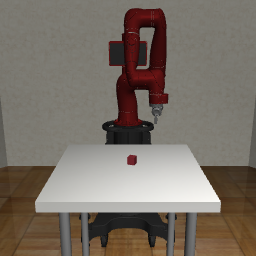

In [7]:
frontview = Image.fromarray(obs['frontview_image'][::-1])
display(frontview)

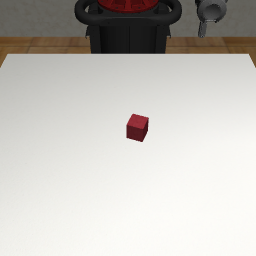

In [8]:
agentview = Image.fromarray(obs['agentview_image'][::-1])
display(agentview)

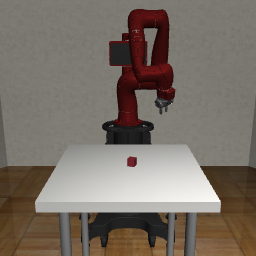

In [9]:
low, high = env.action_spec # get action limits
for i in range(100):
    action = np.random.uniform(low, high) # sample random action
    obs, reward, done, _ = env.step(action)

display(Image.fromarray(obs['frontview_image'][::-1]))

In [10]:
print('number of bodies:', env.sim.model.nbody)
print('number of joints:', env.sim.model.njnt)
print('number of generalized coordinates:', env.sim.model.nq)
print('number of degrees of freedom:', env.sim.model.nv)
print('number of degrees of freedom:', env.sim.model.nu)
print('number of activation states:', env.sim.model.na)

number of bodies: 32
number of joints: 10
number of generalized coordinates: 16
number of degrees of freedom: 15
number of degrees of freedom: 9
number of activation states: 0


In [11]:
print(env.sim.model.body_names)

('world', 'table', 'robot0_base', 'robot0_controller_box', 'robot0_pedestal_feet', 'robot0_torso', 'robot0_pedestal', 'robot0_right_arm_base_link', 'robot0_right_l0', 'robot0_head', 'robot0_screen', 'robot0_head_camera', 'robot0_right_torso_itb', 'robot0_right_l1', 'robot0_right_l2', 'robot0_right_l3', 'robot0_right_l4', 'robot0_right_arm_itb', 'robot0_right_l5', 'robot0_right_hand_camera', 'robot0_right_wrist', 'robot0_right_l6', 'robot0_right_hand', 'gripper0_gripper_base', 'gripper0_l_finger', 'gripper0_l_finger_tip', 'gripper0_r_finger', 'gripper0_r_finger_tip', 'robot0_right_l4_2', 'robot0_right_l2_2', 'robot0_right_l1_2', 'cube')


In [12]:
body_id = 1

print(env.sim.model.body_names[body_id])
print(env.sim.data.body_xpos[body_id])
print(env.sim.data.body_xquat[body_id])

body_id = -1

print()
print(env.sim.model.body_names[body_id])
print('Frame origin:\n', env.sim.data.body_xpos[body_id])
print('\nRotation quaternion:\n', env.sim.data.body_xquat[body_id])
print('\nRotation matrix:\n', env.sim.data.body_xmat[body_id].reshape(3,3))

table
[0.    0.    0.775]
[1. 0. 0. 0.]

cube
Frame origin:
 [-0.02011082  0.02258915  0.82159492]

Rotation quaternion:
 [0.82249329 0.         0.         0.56877481]

Rotation matrix:
 [[ 0.35299043 -0.93562693  0.        ]
 [ 0.93562693  0.35299043  0.        ]
 [ 0.          0.          1.        ]]


In [13]:
# simple example of coordinate transformations
import robosuite.utils.transform_utils as T

T.quat2mat(T.convert_quat(np.array(env.sim.data.body_xquat[body_id]), to="xyzw"))

array([[ 0.35299039, -0.93562698,  0.        ],
       [ 0.93562698,  0.35299039,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [14]:
env.sim.data.body_xmat[body_id].reshape(3, 3)

array([[ 0.35299043, -0.93562693,  0.        ],
       [ 0.93562693,  0.35299043,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [15]:
env.sim.data.body_xpos[body_id]

array([-0.02011082,  0.02258915,  0.82159492])

In [16]:
# get information of all bodies
for i in range(env.sim.model.nbody):
    name = env.sim.model.body_names[i]
    body_id = env.sim.model.body_name2id(name)
    body_xpos = env.sim.data.body_xpos[body_id]
    print(body_id, name, body_xpos)

0 world [0. 0. 0.]
1 table [0.    0.    0.775]
2 robot0_base [-0.56   0.     0.913]
3 robot0_controller_box [-0.56   0.     0.913]
4 robot0_pedestal_feet [-0.56   0.     0.913]
5 robot0_torso [-0.56   0.     0.913]
6 robot0_pedestal [-0.56   0.     0.913]
7 robot0_right_arm_base_link [-0.56   0.     0.913]
8 robot0_right_l0 [-0.56   0.     0.993]
9 robot0_head [-0.56    0.      1.2895]
10 robot0_screen [-0.53010803  0.00254366  1.3945    ]
11 robot0_head_camera [-0.53727941  0.00193341  1.506072  ]
12 robot0_right_torso_itb [-0.61480194 -0.00466339  1.213     ]
13 robot0_right_l1 [-0.48353113  0.05668784  1.23      ]
14 robot0_right_l2 [-0.44260115  0.20318579  1.35949647]
15 robot0_right_l3 [-0.34124176  0.1696652   1.6002591 ]
16 robot0_right_l4 [-0.24989586  0.04860117  1.50737919]
17 robot0_right_arm_itb [-0.15905933  0.05020399  1.48747554]
18 robot0_right_l5 [-0.06841938  0.09084951  1.30276403]
19 robot0_right_hand_camera [-0.11784268  0.16070418  1.29006472]
20 robot0_right_wri